In [20]:
#exploração da base
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas
diabetes = load_diabetes()
diabetes.keys()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [ ]:
tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela.head()

In [13]:
#A coluna 11 é uma medida quantitativa da progressão da doença um ano
tabela['prog'] = diabetes.target
tabela.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [14]:
#seleciona duas colunas
X = tabela[["sex", "prog"]]
print(X)

          sex   prog
0    0.050680  151.0
1   -0.044642   75.0
2    0.050680  141.0
3   -0.044642  206.0
4   -0.044642  135.0
5   -0.044642   97.0
6    0.050680  138.0
7    0.050680   63.0
8    0.050680  110.0
9   -0.044642  310.0
10  -0.044642  101.0
11   0.050680   69.0
12  -0.044642  179.0
13   0.050680  185.0
14  -0.044642  118.0
15   0.050680  171.0
16  -0.044642  166.0
17   0.050680  144.0
18  -0.044642   97.0
19  -0.044642  168.0
20  -0.044642   68.0
21   0.050680   49.0
22  -0.044642   68.0
23   0.050680  245.0
24  -0.044642  184.0
25   0.050680  202.0
26  -0.044642  137.0
27  -0.044642   85.0
28  -0.044642  131.0
29   0.050680  283.0
..        ...    ...
412 -0.044642  261.0
413 -0.044642  113.0
414  0.050680  131.0
415 -0.044642  174.0
416 -0.044642  257.0
417 -0.044642   55.0
418 -0.044642   84.0
419 -0.044642   42.0
420 -0.044642  146.0
421  0.050680  212.0
422  0.050680  233.0
423  0.050680   91.0
424  0.050680  111.0
425 -0.044642  152.0
426  0.050680  120.0
427  0.050680

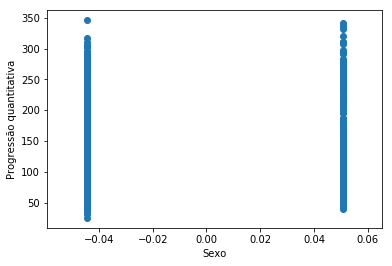

In [17]:
plt.scatter(tabela.sex, tabela.prog)
plt.xlabel('Sexo')
plt.ylabel('Progressão quantitativa')
plt.show()

Coeficientes: 
 [-2.36429319e-14  1.00000000e+00]
Coeficientes: 
 5.684341886080802e-14
-38.51767234618565 233.0 232.99999999999997


Text(0,0.5,'Progressão quantitativa')

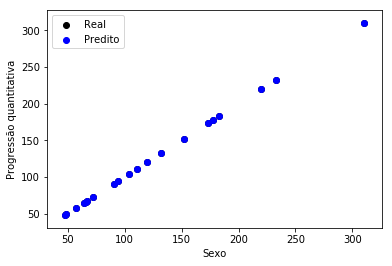

In [18]:
from sklearn import linear_model
#separa em dois conjuntos, um para treinamento e outro para validação (20 últimos)
X_t = X[:-20]
X_v = X[-20:]
#print(X_t["sex"])
y_t = diabetes.target[:-20]
y_v = diabetes.target[-20:]

regr = linear_model.LinearRegression()

# treina o modelo
regr.fit(X_t, y_t)

# faz a predição
y_pred = regr.predict(X_v)

# coeficientes a
print('Coeficientes: \n', regr.coef_)
#intercepto b
print('Coeficientes: \n', regr.intercept_)
#y = 5.10*RM + -0.65*LSTAT + -1.24

#prediz manualmente os valores com base nos coeficientes encontrados na regressao
y_teste = 5.10*X_v["sex"] - 0.65*X_v["prog"]- 1.24

#exibe o valor predito manualmente y_teste, que começa de 486
#exibe o valor real y_t
#exibe o valor predito pela regressão linear

print(y_teste[441], y_v[0],y_pred[0])

#plota todos os valores de validação
plt.scatter(X_v["prog"], y_v,  color='black')
plt.scatter(X_v["prog"], y_pred, color='blue')
plt.legend(["Real", "Predito"])
plt.xlabel('Sexo')
plt.ylabel('Progressão quantitativa')